<a href="https://colab.research.google.com/github/elangbijak4/On_Progress_for_Build_Quantum_Virtual_Machine_Almudaya/blob/main/Quantum_FSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  cirq

In [ ]:
!pip install cirq --upgrade  # Upgrade Cirq to the latest version

In [4]:
import cirq
import matplotlib.pyplot as plt

In [11]:
from cirq.contrib.svg import SVGCircuit  # Import the necessary module for drawing

In [16]:
from IPython.display import SVG, display  # Import display from IPython

In [47]:
import numpy as np

Demonstrasi QFSA (Quantum Finite State Automata)

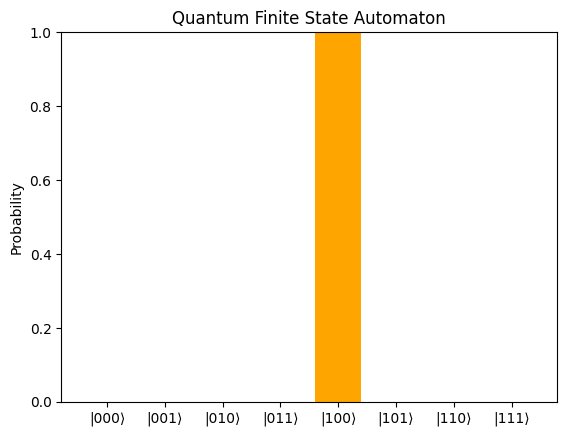

Quantum Finite State Automaton Circuit:
(0, 0): ───H───S───@───@───@───Rx(0.25π)───M───────────────
                   │   │   │
(0, 1): ───H───T───X───@───×───×───────────Ry(0.25π)───M───
                       │   │   │
(0, 2): ───────────────X───×───×───────────Rz(0.25π)───M───


In [117]:
# Function to simulate and plot a multi-qubit state
def simulate_and_plot_multi(circuit, qubits, title):
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)
    state_vector = result.final_state_vector
    probabilities = np.abs(state_vector)**2

    # Generate labels for the state vectors
    num_qubits = len(qubits)
    labels = ['|' + ''.join(str(i) for i in format(x, f'0{num_qubits}b')) + '⟩' for x in range(2**num_qubits)]
    plt.bar(labels, probabilities, color=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow'])
    plt.title(title)
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.show()

# Define qubits
qubits = [cirq.GridQubit(0, i) for i in range(3)]

# Define QFSA Circuit
circuit_qfsa = cirq.Circuit()

# Initial state preparation (e.g., putting qubits in superposition)
circuit_qfsa.append(cirq.H(qubits[0]))  # Put the first qubit in superposition
circuit_qfsa.append(cirq.H(qubits[1]))  # Put the second qubit in superposition

# Apply various gates as transitions
circuit_qfsa.append(cirq.S(qubits[0]))  # S Gate on the first qubit
circuit_qfsa.append(cirq.T(qubits[1]))  # T Gate on the second qubit
circuit_qfsa.append(cirq.CNOT(qubits[0], qubits[1]))  # CNOT Gate with qubit 0 as control and qubit 1 as target
circuit_qfsa.append(cirq.TOFFOLI(qubits[0], qubits[1], qubits[2]))  # Toffoli Gate with qubit 0 and 1 as control and qubit 2 as target
circuit_qfsa.append(cirq.FREDKIN(qubits[0], qubits[1], qubits[2]))  # Fredkin Gate with qubit 0 as control and qubit 1, 2 as swap targets
circuit_qfsa.append(cirq.SWAP(qubits[1], qubits[2]))  # SWAP Gate between qubit 1 and qubit 2
circuit_qfsa.append(cirq.rx(np.pi / 4)(qubits[0]))  # RX Gate on the first qubit
circuit_qfsa.append(cirq.ry(np.pi / 4)(qubits[1]))  # RY Gate on the second qubit
circuit_qfsa.append(cirq.rz(np.pi / 4)(qubits[2]))  # RZ Gate on the third qubit

# Measure the final states
circuit_qfsa.append([cirq.measure(q) for q in qubits])

# Simulate and plot the QFSA circuit
simulate_and_plot_multi(circuit_qfsa, qubits, 'Quantum Finite State Automaton')

# Print the circuit
print("Quantum Finite State Automaton Circuit:")
print(circuit_qfsa)

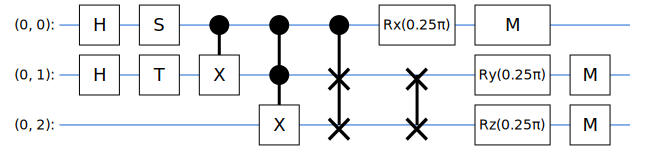

In [118]:
# Use SVGCircuit to draw the circuit
svg_circuit = cirq.contrib.svg.SVGCircuit(circuit_qfsa)
svg_string = svg_circuit._repr_svg_()
display(SVG(svg_string))